In [41]:
#######  Scrape LinkedIn Comments
#######
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
import pandas as pd

# LinkedIn Login Details (replace with your credentials)
USERNAME = "Write_Your_UserName"
PASSWORD = "Write_Your_UserPassWord"

# LinkedIn Post URL
post_url = "https://www.linkedin.com/posts/activity-7126201195827744768-yOrn"

# Start WebDriver
driver = webdriver.Chrome()

# Open LinkedIn and log in
driver.get("https://www.linkedin.com/login")
time.sleep(2)
driver.find_element(By.ID, "username").send_keys(USERNAME)
driver.find_element(By.ID, "password").send_keys(PASSWORD)
driver.find_element(By.ID, "password").send_keys(Keys.RETURN)
time.sleep(3)

# Open post URL
driver.get(post_url)
time.sleep(3)

# Scroll to load all comments
for _ in range(5):  
    driver.find_element(By.TAG_NAME, "body").send_keys(Keys.END)
    time.sleep(2)

# Extract comments
comments = driver.find_elements(By.CLASS_NAME, "comments-comment-item__main-content")
comment_texts = [comment.text for comment in comments]

# Close WebDriver
driver.quit()

# Save comments to CSV
df = pd.DataFrame(comment_texts, columns=["Comment"])
df.to_csv("linkedin_comments.csv", index=False)

print("Comments Scraped and Saved!")

Comments Scraped and Saved!


In [19]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time

# LinkedIn login credentials
USERNAME = "shiva.maleki119@gmail.com"
PASSWORD = "m_0011_SH"

# LinkedIn Post URL
post_url = "https://www.linkedin.com/posts/activity-7126201195827744768-yOrn"

# Initialize WebDriver
driver = webdriver.Chrome()

# Open LinkedIn login page
driver.get("https://www.linkedin.com/login")
time.sleep(2)
driver.find_element(By.ID, "username").send_keys(USERNAME)
driver.find_element(By.ID, "password").send_keys(PASSWORD)
driver.find_element(By.ID, "password").send_keys(Keys.RETURN)
time.sleep(3)

# Open LinkedIn post
driver.get(post_url)
time.sleep(3)

# Scroll down to load comments
scroll_attempts = 10  # Number of scrolls (increase if needed)
for _ in range(scroll_attempts):
    driver.find_element(By.TAG_NAME, "body").send_keys(Keys.END)
    time.sleep(2)  # Give LinkedIn time to load more comments

# Extract all comments
comments = driver.find_elements(By.CLASS_NAME, "comments-comment-item__main-content")
comment_texts = [comment.text for comment in comments]

# Print number of comments scraped
print(f"Total comments scraped: {len(comment_texts)}")

# Save comments to a CSV file
import pandas as pd
df = pd.DataFrame(comment_texts, columns=["Comment"])
df.to_csv("linkedin_comments.csv", index=False)

print("Comments successfully saved!")

# Close WebDriver
driver.quit()

Total comments scraped: 61
Comments successfully saved!


In [42]:
##### Check if Data is Loaded Correctly
#####
import pandas as pd

# Load the dataset
df = pd.read_csv("linkedin_comments_sentiment.csv")

# Print first few rows
print(df.head())

# Check if Sentiment column exists
print("Columns in DataFrame:", df.columns)

# Check if there are empty rows
print("Number of rows:", len(df))

                                             Comment Sentiment
0                  آفرین دختر با همین فرمون بروووووو   5 stars
1                         صدردصد با همین فرمون برووو    1 star
2                    Very well deserved Dr. Shiva!❤️   5 stars
3  Thank you so much Niloofar joon! ❤️ It is kind...   5 stars
4  مبارکمون باشه شیوا جونم.\nبهت افتخار میکنیم😍❤️...   5 stars
Columns in DataFrame: Index(['Comment', 'Sentiment'], dtype='object')
Number of rows: 61


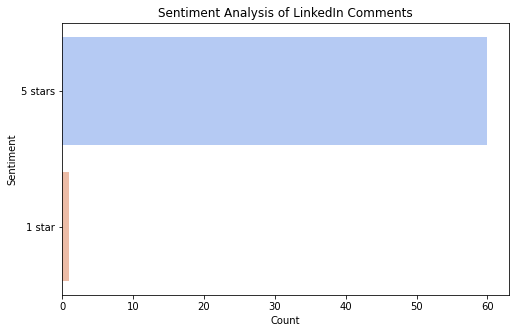

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("linkedin_comments_sentiment.csv")

# Plot Sentiment Distribution
plt.figure(figsize=(8, 5))
sns.countplot(y=df["Sentiment"], palette="coolwarm")
plt.xlabel("Count")
plt.ylabel("Sentiment")
plt.title("Sentiment Analysis of LinkedIn Comments")
plt.show()

In [44]:
##### Load and Review Sentiment Data
##### 
import pandas as pd

# Load the sentiment analysis results
df = pd.read_csv("linkedin_comments_sentiment.csv")

# Display first few rows
print(df.head())

# Check dataset summary
print("Total Comments:", len(df))
print("Sentiment Distribution:\n", df["Sentiment"].value_counts())

                                             Comment Sentiment
0                  آفرین دختر با همین فرمون بروووووو   5 stars
1                         صدردصد با همین فرمون برووو    1 star
2                    Very well deserved Dr. Shiva!❤️   5 stars
3  Thank you so much Niloofar joon! ❤️ It is kind...   5 stars
4  مبارکمون باشه شیوا جونم.\nبهت افتخار میکنیم😍❤️...   5 stars
Total Comments: 61
Sentiment Distribution:
 5 stars    60
1 star      1
Name: Sentiment, dtype: int64


In [45]:
##### Convert Star Ratings to Categories
##### Modify your dataset to map the star ratings to "POSITIVE", "NEUTRAL", and "NEGATIVE" categories.
#####
# Convert sentiment from star ratings to categorical labels
df["Sentiment"] = df["Sentiment"].astype(str).str.strip().str.lower()  # Normalize text

# Map star ratings to categories
sentiment_mapping = {
    "5 stars": "POSITIVE",
    "4 stars": "POSITIVE",
    "3 stars": "NEUTRAL",
    "2 stars": "NEGATIVE",
    "1 star": "NEGATIVE"
}

# Apply mapping
df["Sentiment"] = df["Sentiment"].replace(sentiment_mapping)

# Save cleaned data
df.to_csv("linkedin_comments_sentiment_clean.csv", index=False)

print(df["Sentiment"].value_counts())  # Check new distribution

POSITIVE    60
NEGATIVE     1
Name: Sentiment, dtype: int64


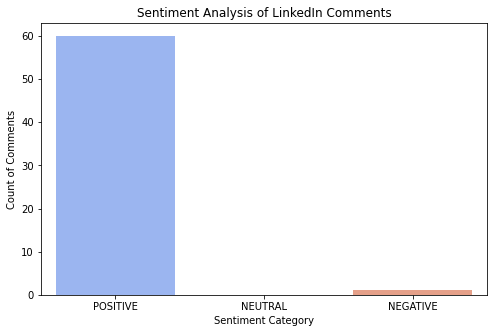

In [46]:
##### Analyze Sentiment Distribution (Positive vs. Negative)
#####
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Sentiment", palette="coolwarm", order=["POSITIVE", "NEUTRAL", "NEGATIVE"])
plt.xlabel("Sentiment Category")
plt.ylabel("Count of Comments")
plt.title("Sentiment Analysis of LinkedIn Comments")
plt.show()

In [47]:
##### Analyze Percentage of Positive vs. Negative Comments
#####
# Load cleaned sentiment data
df = pd.read_csv("linkedin_comments_sentiment_clean.csv")

# Count the number of each sentiment
sentiment_counts = df["Sentiment"].value_counts()

# Convert to percentage
sentiment_percentage = (sentiment_counts / len(df)) * 100

# Display the results
print("Sentiment Percentage:\n", sentiment_percentage)


Sentiment Percentage:
 POSITIVE    98.360656
NEGATIVE     1.639344
Name: Sentiment, dtype: float64


In [50]:
#####  Identify Most Frequent Words in Positive & Negative Comments
#####
from collections import Counter
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# Function to clean text
def clean_text(text):
    text = re.sub(r"[^a-zA-Z ]", "", text.lower())  # Remove special characters & lowercase
    words = text.split()
    return [word for word in words if word not in stop_words and len(word) > 2]  # Remove stopwords

# Separate positive & negative comments
positive_comments = df[df["Sentiment"] == "POSITIVE"]["Comment"].astype(str).apply(clean_text)
negative_comments = df[df["Sentiment"] == "NEGATIVE"]["Comment"].astype(str).apply(clean_text)

# Flatten lists & count words
positive_words = Counter([word for sublist in positive_comments for word in sublist])
negative_words = Counter([word for sublist in negative_comments for word in sublist])

# Display most common words
print("Top 10 Positive Words:", positive_words.most_common(10))
print("Top 10 Negative Words:", negative_words.most_common(10))

Top 10 Positive Words: [('shiva', 23), ('congratulations', 22), ('thanks', 22), ('joon', 16), ('kindness', 9), ('lot', 8), ('thank', 7), ('much', 7), ('jan', 7), ('proud', 5)]
Top 10 Negative Words: []


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shiva\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


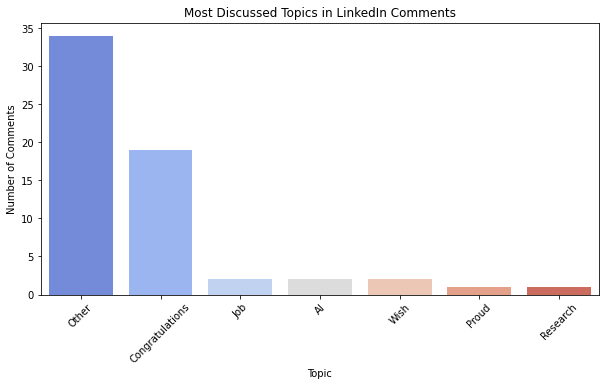

In [56]:
##### Identify Most Engaging Topics
##### To discover which topics generate the most engagement, analyze keywords.
#####
topic_keywords = ["AI", "Harvard", "Machine Learning", "Hiring", "Job", "Research", "Congratulations", "Proud", "Wish"]

# Extract topics from comments
df["Topic"] = df["Comment"].apply(lambda x: next((word for word in topic_keywords if word.lower() in x.lower()), "Other"))

# Count engagement per topic
topic_counts = df["Topic"].value_counts()

# Plot most discussed topics
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(x=topic_counts.index, y=topic_counts.values, palette="coolwarm")
plt.xlabel("Topic")
plt.ylabel("Number of Comments")
plt.title("Most Discussed Topics in LinkedIn Comments")
plt.xticks(rotation=45)
plt.show()